
--- Training Network with Tanh (tansig) Activation ---
Epoch 10 | Cost: 1.810910
Epoch 100 | Cost: 0.005674
Epoch 200 | Cost: 0.000009
Epoch 400 | Cost: 0.000000
Epoch 1000 | Cost: 0.000000


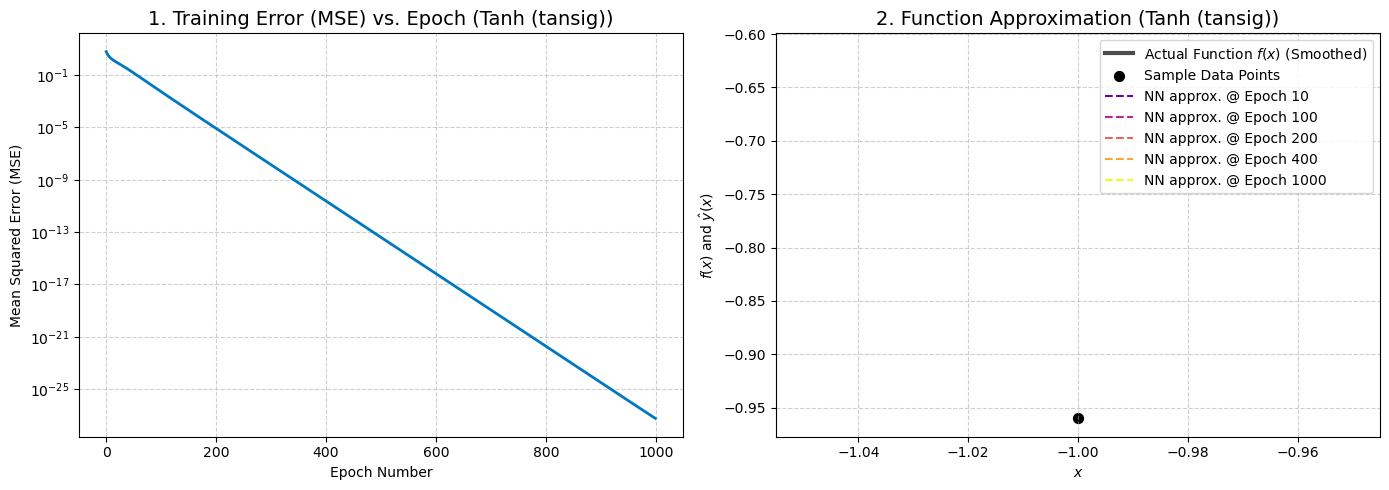


--- Training Network with LogSig (Sigmoid) Activation ---
Epoch 10 | Cost: 0.004978
Epoch 100 | Cost: 0.000000
Epoch 200 | Cost: 0.000000
Epoch 400 | Cost: 0.000000
Epoch 1000 | Cost: 0.000000


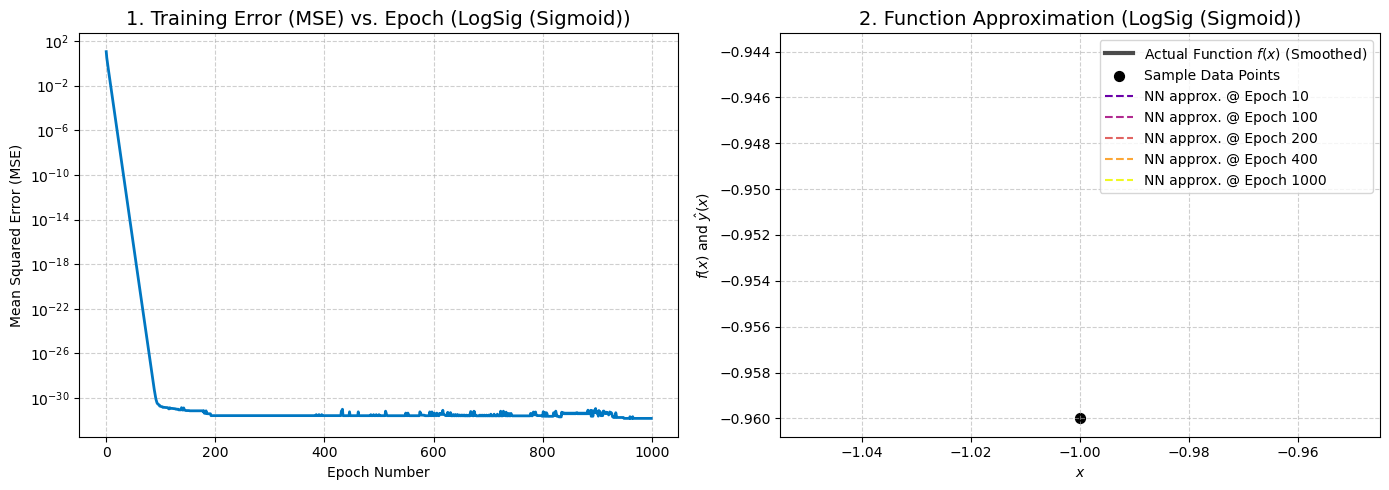


--- Training Network with ReLU Activation ---
Epoch 10 | Cost: 2.785833
Epoch 100 | Cost: 0.295646
Epoch 200 | Cost: 0.020472
Epoch 400 | Cost: 0.000094
Epoch 1000 | Cost: 0.000000


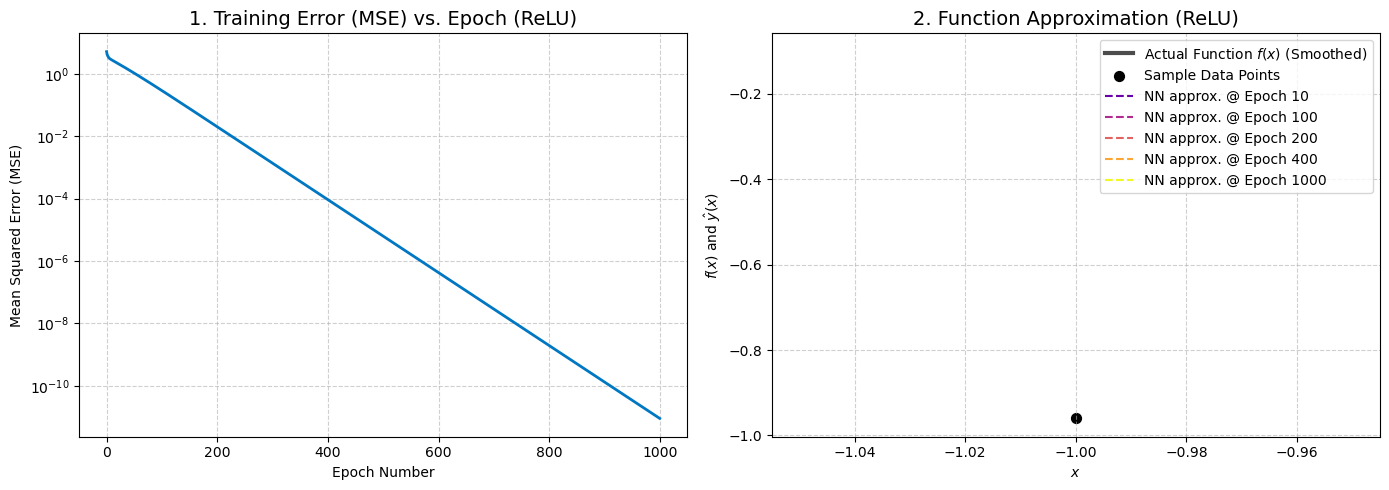


--- Training Network with RadialBasis (Gaussian) Activation ---
Epoch 10 | Cost: 1.499097
Epoch 100 | Cost: 0.000001
Epoch 200 | Cost: 0.000000
Epoch 400 | Cost: 0.000000
Epoch 1000 | Cost: 0.000000


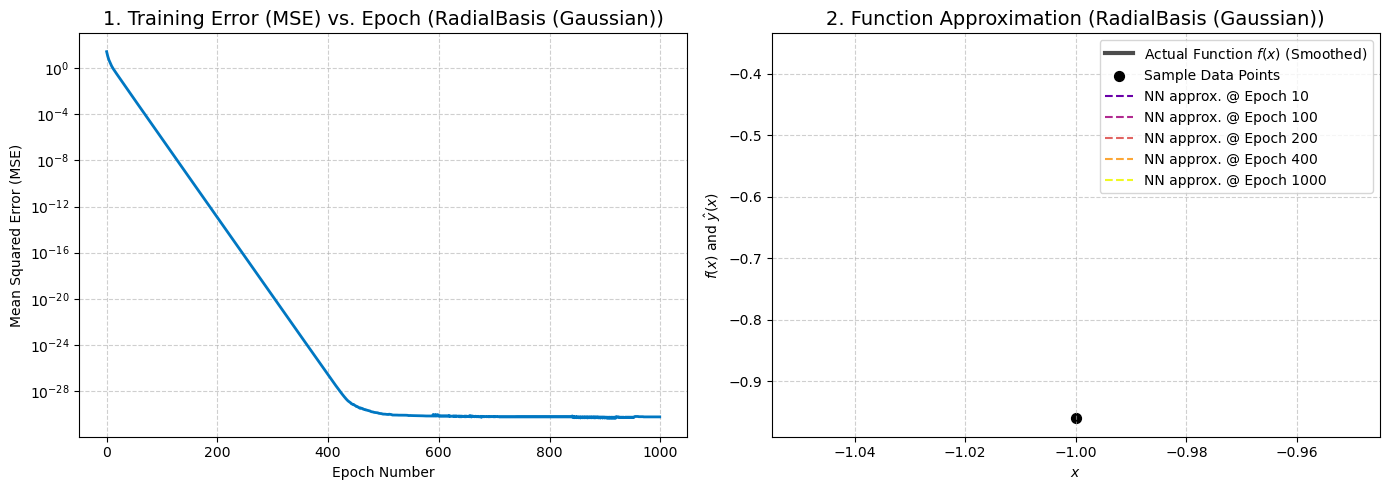


--- Execution Complete ---
Check the generated plot windows for the results of each activation function.
Note: 'tansig' is functionally identical to 'tanh' and is covered by the first run.
Note: The implementation uses standard feedforward MLP architecture.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# X: Input (1x21 matrix, reshaped to 1 row x N columns for matrix multiplication)
X_data = np.array([[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]])

# Y: Target Output (1x21 matrix)
Y_data = np.array([[-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321]])

#  Activation Functions and their Derivatives
  
"""Hyperbolic Tangent Activation Function."""
def tanh(Z):
    return np.tanh(Z)
    
"""Derivative of Tanh."""
def tanh_derivative(Z):
   
    return 1 - np.power(tanh(Z), 2)
    
"""Logistic/Sigmoid Activation Function."""
def sigmoid(Z):
    
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    
    s = sigmoid(Z)
    return s * (1 - s)
    
"""Rectified Linear Unit (ReLU)."""
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
   
    return (Z > 0) * 1.0
   
"""Radial Basis Function."""
def rbf_gaussian(Z):
    return np.exp(-Z**2)

def rbf_gaussian_derivative(Z):

    return -2 * Z * np.exp(-Z**2)

# Neural Network Core Functions 

def initialize_parameters(n_x, n_h, n_y):

    # Hidden Layer (1)
    W1 = np.random.randn(n_h, n_x) * np.sqrt(1 / n_x)  # n_h x n_x
    b1 = np.zeros((n_h, 1))                           # n_h x 1
    # Output Layer (2)
    W2 = np.random.randn(n_y, n_h) * np.sqrt(1 / n_h)  # n_y x n_h
    b2 = np.zeros((n_y, 1))                           # n_y x 1

    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
"""Perform the forward pass."""
def forward_propagation(X, parameters, activation_fn):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

    # Layer 1 (Hidden)
    Z1 = np.dot(W1, X) + b1
    A1 = activation_fn(Z1)

    # Layer 2 (Output - Linear activation for regression)
    Z2 = np.dot(W2, A1) + b2
    Y_hat = Z2

    return Y_hat, {"Z1": Z1, "A1": A1}
    
"""Calculate the Mean Squared Error (MSE) cost."""
def calculate_cost(Y_hat, Y):
    
    N = Y.shape[1]
    cost = np.sum((Y_hat - Y) ** 2) / N
    return np.squeeze(cost)
    
"""Perform the backward pass"""
def backward_propagation(X, Y, Y_hat, parameters, cache, activation_derivative):
    
    N = X.shape[1]
    W2 = parameters["W2"]
    Z1 = cache["Z1"]
    A1 = cache["A1"]

    # Output Layer (Linear Activation)
    dZ2 = 2 * (Y_hat - Y) / N  # Shape: n_y x N

    # Gradients for Layer 2 parameters
    dW2 = np.dot(dZ2, A1.T)  # n_y x n_h
    db2 = np.sum(dZ2, axis=1, keepdims=True) # n_y x 1

    # Hidden Layer
    # dA1 = Gradient passed back from W2
    dA1 = np.dot(W2.T, dZ2) # n_h x N

    dZ1 = dA1 * activation_derivative(Z1) # n_h x N

    # Gradients for Layer 1 parameters
    dW1 = np.dot(dZ1, X.T)  # n_h x n_x
    db1 = np.sum(dZ1, axis=1, keepdims=True) # n_h x 1

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(parameters, grads, learning_rate):
    
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters

# Plotting Function 
"""Generate the Error vs Epoch and Approximation vs Actual plots."""
def plot_results(X_data, Y_data, Y_pred_history, cost_history, activation_name, epochs_to_plot):   

    # Training Error vs Epoch Number
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cost_history, color='#0077c2', linewidth=2)
    plt.title(f'1. Training Error (MSE) vs. Epoch ({activation_name})', fontsize=14)
    plt.xlabel('Epoch Number')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.yscale('log') # Use log scale to show detail in training

    plt.subplot(1, 2, 2)
    # Sort X for continuous plotting
    sort_indices = np.argsort(X_data[0])
    X_sorted = X_data[0][sort_indices]
    Y_actual_sorted = Y_data[0][sort_indices]

    # Plot actual function f(x)
    plt.plot(X_sorted, Y_actual_sorted, 'k-', label='Actual Function $f(x)$ (Smoothed)', linewidth=3, alpha=0.7)
    plt.scatter(X_data[0], Y_data[0], color='black', marker='o', s=50, label='Sample Data Points')

    # Plot NN approximation at specified epochs
    colors = plt.cm.plasma(np.linspace(0.2, 1, len(epochs_to_plot)))
    for i, epoch in enumerate(epochs_to_plot):
        if epoch in Y_pred_history:
            Y_pred = Y_pred_history[epoch]
            Y_pred_sorted = Y_pred[0][sort_indices]
            plt.plot(X_sorted, Y_pred_sorted, color=colors[i], linestyle='--', label=f'NN approx. @ Epoch {epoch}')

    plt.title(f'2. Function Approximation ({activation_name})', fontsize=14)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$ and $\hat{y}(x)$')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Main Training Function

def nn_model(X, Y, n_h, num_epochs, learning_rate, activation_fn, activation_derivative, activation_name):
   
    print(f"\n--- Training Network with {activation_name} Activation ---")

    n_x = X.shape[0] # Input size (1)
    n_y = Y.shape[0] # Output size (1)

    parameters = initialize_parameters(n_x, n_h, n_y)

    cost_history = []
    epochs_to_plot = [10, 100, 200, 400, 1000]
    Y_pred_history = {}

    for i in range(num_epochs):
        # Forward Pass
        Y_hat, cache = forward_propagation(X, parameters, activation_fn)

        # Cost Calculation
        cost = calculate_cost(Y_hat, Y)
        cost_history.append(cost)

        # Backward Pass
        grads = backward_propagation(X, Y, Y_hat, parameters, cache, activation_derivative)

        # Parameter Update
        parameters = update_parameters(parameters, grads, learning_rate)

        # Record prediction for plotting
        if i + 1 in epochs_to_plot:
            Y_pred_history[i + 1] = Y_hat.copy()
            print(f"Epoch {i + 1} | Cost: {cost:.6f}")

    # Final prediction after all epochs
    if num_epochs not in Y_pred_history:
         Y_hat_final, _ = forward_propagation(X, parameters, activation_fn)
         Y_pred_history[num_epochs] = Y_hat_final.copy()

    plot_results(X, Y, Y_pred_history, cost_history, activation_name, epochs_to_plot)

# Execution

# Transpose X and Y to be N columns
X = X_data.T
Y = Y_data.T

N_HIDDEN_UNITS = 10
LEARNING_RATE = 0.005
N_EPOCHS = 1000

# Define the set of activation functions to test
activation_set = [
    (tanh, tanh_derivative, "Tanh (tansig)"),
    (sigmoid, sigmoid_derivative, "LogSig (Sigmoid)"),
    (relu, relu_derivative, "ReLU"),
    (rbf_gaussian, rbf_gaussian_derivative, "RadialBasis (Gaussian)")
]

# Run the training for each activation function
for act_fn, act_deriv, name in activation_set:
    # Learning rate adjustments
    current_lr = LEARNING_RATE
    if name == "LogSig (Sigmoid)":
        current_lr = 0.05  
    elif name == "RadialBasis (Gaussian)":
        current_lr = 0.01 
    
    nn_model(
        X, Y,
        n_h=N_HIDDEN_UNITS,
        num_epochs=N_EPOCHS,
        learning_rate=current_lr,
        activation_fn=act_fn,
        activation_derivative=act_deriv,
        activation_name=name
    )

print("\n--- Execution Complete ---")
print("Check the generated plot windows for the results of each activation function.")
print("Note: 'tansig' is functionally identical to 'tanh' and is covered by the first run.")
print("Note: The implementation uses standard feedforward MLP architecture.")